## 계층적 군집분석
n개의 군집으로 시작해 점차 군집의 개수를 줄여나가는 방법   
__가.__ 종류  
* 최단연결법
    - nXn 거리행렬에서 거리가 가장 가까운 데이터를 묶어서 군집을 형성함
* 최장연결법
    - 데이터와의 거리를 계산할 때 최장거리를 거리로 계산함
* 평균연결법
    - 데이터와의 거리를 계산할 때 평균을 거리로 계산함
 * 와드연결법
     - 군집 내 편차들의 제곱합을 고려한 방법
     - 군집 간 정보의 손실을 최소화하기 위해 군집화를 진행함
   
   
__나.__ 군집화
* 거리행렬을 통해 가장 가까운 거리의 객체들 관계를 규명함
* 덴드로그램 그리기
* 덴드로그램의 최상단부터 세로축의 개수에 따라 가로선을 그어 군집 개수를 선택함
* 각 객체들의 구성을 고려해 적절한 군집수 생성함

함수1. linkage 함수

linkage(y, method='single', metric='euclidean')   
* y: 거리행렬(데이터를 넣으면 됨)
    - 모든 요소가 유한해야함(NaNs, infs가 없어야함)
* method: 
    - single : 최단연결법
    - complete : 최장연결법
    - average : 평균연결법
    - centroid : 중심연결법
    - ward : 와드연결법
* metric:
    - euclidean :유클리디언 거리
    - seuclidean : 표준화거리
    - mahalanobis : 마할라노비스 거리
    - chebyshev : 체비셰프 거리
    - cityblock : 맨하탄거리
    - canberra : 캔버라 거리
    - minkowski : 민코우스키 거리
    - jaccard : 자카드 거리
    - cosine : 코사인 유사도

함수2. dendrogram 함수

dendrogram(Z, orientation='top', labels=None, color_threshold=None, get_leaves=True, ,    
* Z : linkage matrix. linkage 함수로 생성함
* orientation
    - top: 플롯이 위에서 아래방향으로 그려짐
    - bottom: 플롯이 아래에서 위방향으로 그려짐
    - left: 플롯이 오른쪽에서 왼쪽방향으로 그려짐
    - right: 플롯이 왼쪽에서 오른쪽방향으로 그려짐


scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')

__[예제]__    
USArrests 데이터의 정보로 거리를 구하고 최단, 최장, 평균연결법을 실시해보아라

이 데이터 세트에는 1973년에 미국 50개 주 각각에서 폭행, 살인 및 강간으로 체포된 인구 100,000명당 통계가 포함되어 있습니다. 또한 도시 지역에 거주하는 인구 비율도 제공됩니다.

4개의 변수에 대한 50개의 관측값이 있는 데이터 프레임.

* Murder: 살인 체포(100,000명당)
* Assault: 폭행 체포(100,000명당)
* UrbanPop : 도시 인구 비율
* Rape:  강간 체포(100,000명당)

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

In [2]:
US = pd.read_csv('C:/adp/data/USArrests.csv')
US.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labelList=US.State.tolist()
US.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
US.iloc[:, 1::]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


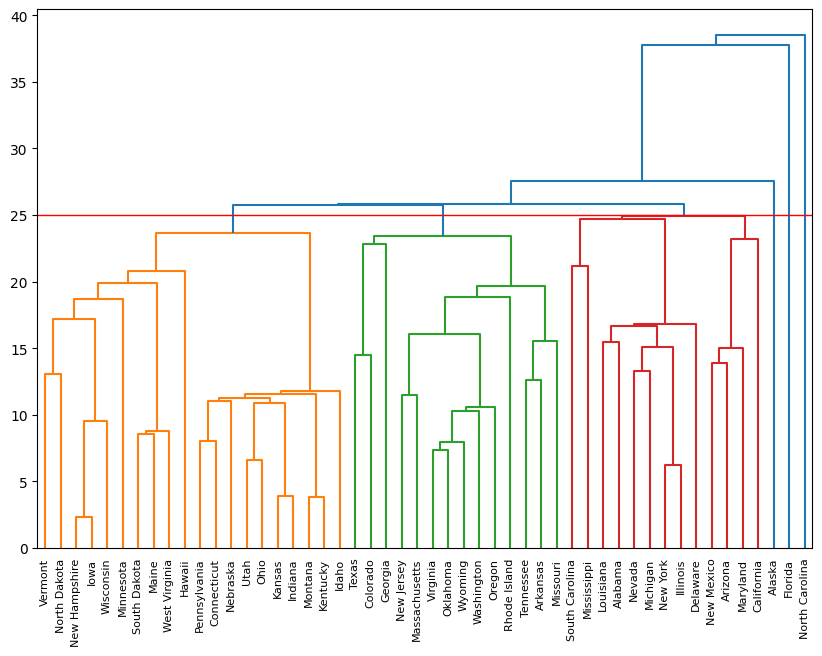

In [10]:
# 최단연결법
single = linkage(US.iloc[:, 1::], metric = 'euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation = 'top',
            labels=labelList,
            distance_sort = 'descending',
            color_threshold = 25,   #군집의 수를 설정하는 Height 값 설정
            show_leaf_counts = True)
plt.axhline(y=25, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

In [11]:
single

array([[14.        , 28.        ,  2.29128785,  2.        ],
       [16.        , 25.        ,  3.8340579 ,  2.        ],
       [13.        , 15.        ,  3.92937654,  2.        ],
       [12.        , 31.        ,  6.23698645,  2.        ],
       [34.        , 43.        ,  6.63777071,  2.        ],
       [35.        , 45.        ,  7.35527022,  2.        ],
       [49.        , 55.        ,  7.93095202,  3.        ],
       [ 6.        , 37.        ,  8.0274529 ,  2.        ],
       [18.        , 40.        ,  8.53756406,  2.        ],
       [47.        , 58.        ,  8.76698352,  3.        ],
       [48.        , 50.        ,  9.50841732,  3.        ],
       [46.        , 56.        , 10.30533842,  4.        ],
       [36.        , 61.        , 10.57922492,  5.        ],
       [52.        , 54.        , 10.92016483,  4.        ],
       [26.        , 57.        , 11.070682  ,  3.        ],
       [63.        , 64.        , 11.25610945,  7.        ],
       [20.        , 29.

fcluster(Z, t, criterion='distance')    
* Z: linkage 함수로 반환되는 matrix로 구성된 계층군집
* t: 상수. flat clusters 형성할 때 적용하는 임계값. 덴드로그램의 color_threshold랑 일치하게 설정하면 그 값에 따른 군집결과 확인 가능
* criterion: flat cluster 형성하는 기준
    - distance: 각 군집의 원래 관측치가 t보다 큰 동위원소 거리를 갖지 않도록 군집을 형성

In [12]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(single, 25, 'distance')
assignments

array([1, 4, 1, 2, 1, 2, 3, 1, 5, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 6, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [13]:
US['cluster'] = assignments

In [15]:
US.tail()

,State,Murder,Assault,UrbanPop,Rape,cluster
45,Virginia,8.5,156,63,20.7,2
46,Washington,4.0,145,73,26.2,2
47,West Virginia,5.7,81,39,9.3,3
48,Wisconsin,2.6,53,66,10.8,3
49,Wyoming,6.8,161,60,15.6,2


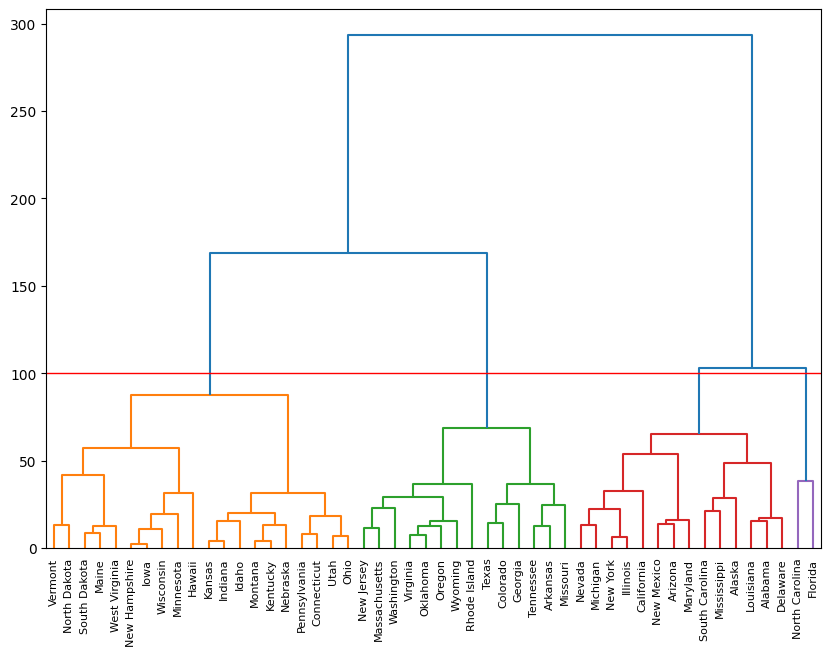

In [16]:
# 최장연결법
complete = linkage(US.iloc[:, 1::], metric = 'euclidean', method='complete')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(complete,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=100, 
            show_leaf_counts=True)
plt.axhline(y=100, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

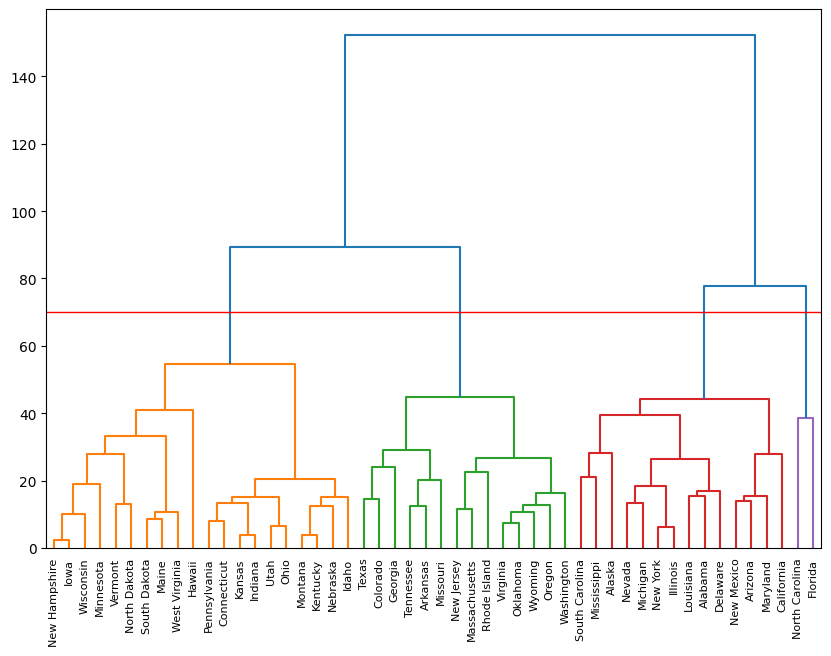

In [17]:
# 평균연결법
average = linkage(US.iloc[:, 1::], metric = 'euclidean', method='average')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(average,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=70,
            show_leaf_counts=True)
plt.axhline(y=70, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

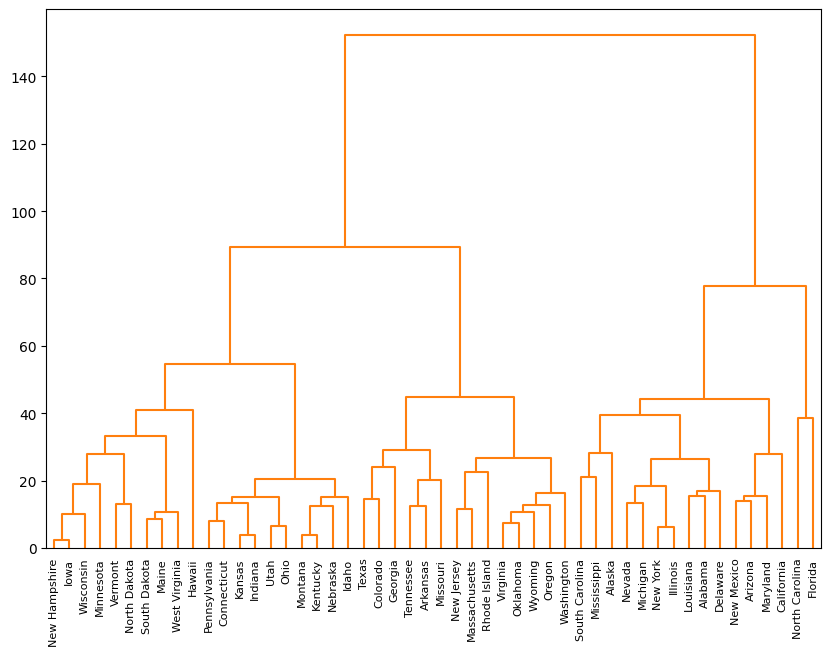

In [18]:
# 와드연결법
ward = linkage(US.iloc[:, 1::], metric = 'euclidean', method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(average,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

In [29]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [31]:
US['cluster'] = assignments

In [19]:
US.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.584615,263.538462,70.769231,27.807692
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000
4,10.000000,263.000000,48.000000,44.500000
5,15.400000,335.000000,80.000000,31.900000
6,13.000000,337.000000,45.000000,16.100000
